# Data Preprocessing

## Library Imports

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import tree as clf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

## Data Imports

In [292]:
df=pd.read_csv('android.csv')

## EDA (Exploratory Data Analysis)

In [294]:
df

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [295]:
df.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             70 non-null     object 
 1   cpu-usage                        70 non-null     float64
 2   context-switch                   70 non-null     float64
 3   cpu-migration                    70 non-null     float64
 4   page-faults                      70 non-null     float64
 5   cycles-GHz                       70 non-null     float64
 6   stalled-cycles-frontend-percent  70 non-null     float64
 7   stalled-cycles-backend-percent   70 non-null     float64
 8   Instructions-per-cycle           70 non-null     float64
 9   stalled-cycles-per-instruction   70 non-null     float64
 10  branches                         70 non-null     float64
 11  branch-misses-percent            70 non-null     float64
 12  bus-cycle               

In [297]:
df.describe()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,0.224857,3.268829,0.200843,22.632400,0.703786,1190.133143,2398.515143,45.230571,0.829714,161444.605486,7.145571,78221.285714,70.325429,13201.262757,1.985734e+06,0.171429
std,0.263227,5.304954,0.318326,19.539722,0.497743,7444.910196,17575.281223,312.370354,0.715005,98600.462833,5.631135,20085.880317,35.977729,5375.939327,3.860305e+05,0.379604
min,0.000000,0.000000,0.000000,0.110000,0.000000,11.070000,12.870000,0.160000,0.070000,182.384000,0.530000,24367.000000,8.980000,13.393000,8.443950e+05,0.000000
25%,0.010250,0.733000,0.000000,8.250000,0.213250,56.160000,43.905000,0.907500,0.422500,93552.000000,2.717500,68212.000000,34.542750,11308.500000,1.786604e+06,0.000000
50%,0.134000,2.000000,0.099500,15.000000,0.793000,140.485000,107.915000,1.335000,0.645000,138971.000000,6.010000,84719.500000,75.459000,13507.000000,2.114808e+06,0.000000
75%,0.363000,4.000000,0.203000,33.000000,1.065500,303.150000,266.022500,4.817500,0.970000,212997.250000,11.165000,93978.000000,106.531000,15498.250000,2.281833e+06,0.000000
max,1.099000,37.000000,2.000000,90.000000,1.664000,62414.160000,147267.450000,2617.310000,4.860000,558519.000000,26.430000,98792.000000,129.192000,28428.000000,2.370923e+06,1.000000


In [298]:
df.shape

(70, 17)

In [299]:
df = df.sample(frac=1).reset_index(drop=True)

In [300]:
import seaborn as sns

In [301]:
# sns.countplot(x='malware',df=df)


## Handling Missing Value

In [303]:
target_count = df.malware.value_counts()
print('class 0:', target_count[0])
print('class 1:', target_count[1])

class 0: 58
class 1: 12


In [304]:
count_class_0, count_class_1 = df.malware.value_counts()

In [305]:
df_class_0 = df[df['malware'] == 0]
df_class_1 = df[df['malware'] == 1]

In [306]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [307]:
df_test_over.shape

(116, 17)

In [308]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [309]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,cat,0.412,37.000,0.000,31.0,0.757,127.44,99.30,1.52,0.84,126140.0,6.77,75666,101.751,9177.0,1815993
1,whoami,0.150,0.523,0.000,50.0,0.035,3599.01,2861.55,37.76,0.95,134083.0,11.20,94940,82.799,15177.0,2278579
2,git,0.098,3.000,0.000,25.0,0.783,151.11,163.99,1.72,0.95,129833.0,11.38,95853,60.687,22233.0,2300465
4,head,0.093,5.000,0.190,13.0,0.803,157.03,109.53,2.72,0.58,348305.0,2.16,94846,58.688,12534.0,2276301
5,power-statistics,0.058,3.000,0.162,5.0,0.819,52.64,39.63,0.50,1.05,116867.0,2.29,57358,29.305,8023.0,1416731


In [310]:
Y.head()

,malware
0,0
1,0
2,0
4,0
5,0


In [311]:
X, Y=shuffle(X,Y)

## Feature Engineering

In [313]:
 X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
46,0.001,9.00,0.000,9.00,1.047,148.52,128.07,0.95,1.56,86291.000,13.61,89078,112.547,19866.0,2137934
48,0.179,3.00,0.385,18.00,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441
20,1.099,0.13,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.000,2.11,45507,92.371,8874.0,1093187
51,0.577,0.00,0.000,48.00,0.343,384.13,314.11,3.17,1.21,108002.000,12.93,93825,89.487,14077.0,2251821
12,0.579,19.00,0.000,26.00,0.297,359.57,359.34,4.99,0.72,153480.000,7.36,87639,95.313,12128.0,2103360


## Handling Outlier

## Data Visualization

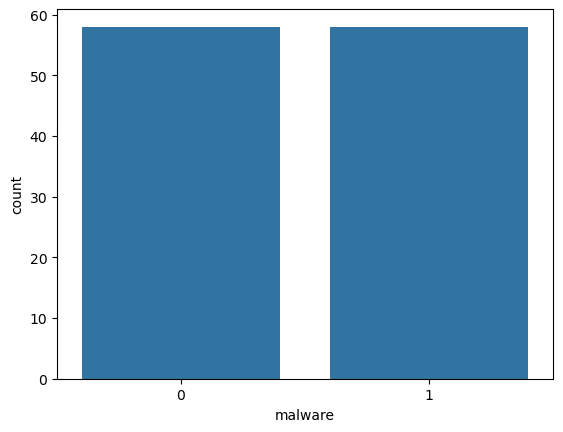

In [316]:
sns.countplot(x= 'malware',data=df_test_over)
plt.show()

In [317]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [318]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
9,branches,992966.056998
14,ref-cycles,276718.564073
6,stalled-cycles-backend-percent,132312.014251
5,stalled-cycles-frontend-percent,45833.072138
11,bus-cycle,43123.639523
13,cache-references,3125.432134
7,Instructions-per-cycle,2846.254897
12,cache-misses-percent,424.520094
3,page-faults,159.676505
10,branch-misses-percent,74.243045


[0.08534465 0.04512855 0.04000807 0.06658967 0.04924518 0.02342854
 0.02926821 0.02542805 0.14318088 0.09447116 0.10623097 0.07748527
 0.12307835 0.03630069 0.05481178]


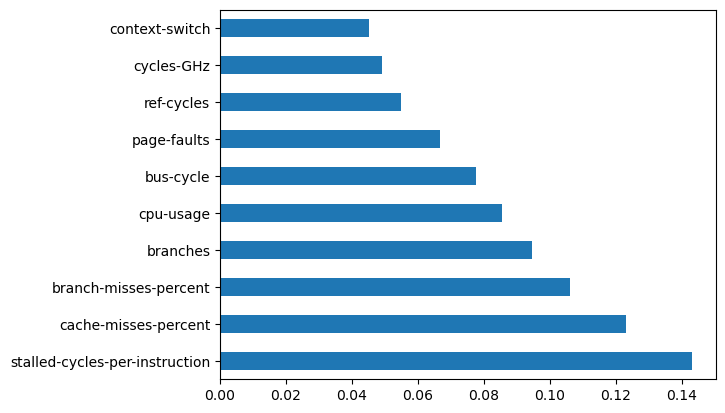

In [319]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

## Train Test Split 

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [323]:
X_train.shape

(92, 15)

In [324]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
59,0.882,4.000,0.300,33.0,0.012,11.07,12.87,0.59,0.22,48230.0,1.19,25984,40.036,5538.0,844395
33,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069
49,0.249,2.000,0.120,8.0,0.974,57.66,47.53,0.75,0.77,171234.0,3.89,70828,32.050,13142.0,1785454
34,0.133,2.000,0.097,3.0,1.229,54.41,43.67,0.90,0.61,208990.0,2.70,83089,33.595,11350.0,1832390
17,0.488,0.795,0.000,37.0,0.738,216.57,188.24,1.18,1.83,86205.0,12.66,93244,107.295,12601.0,2237832


In [325]:
Y_train.head()

,malware
59,0
33,1
49,0
34,0
17,1


## Model Initalization

In [327]:
tree = DecisionTreeClassifier()

In [328]:
clf.DecisionTreeClassifier()

DecisionTreeClassifier()

In [329]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [330]:
Y_pred = tree.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [331]:
model1=metrics.accuracy_score(Y_test,Y_pred)
print(model1)

1.0


In [332]:
rf_model = RandomForestClassifier(random_state=42)

In [333]:
rf_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [334]:
cnf_matrix = confusion_matrix(Y_test,Y_pred)

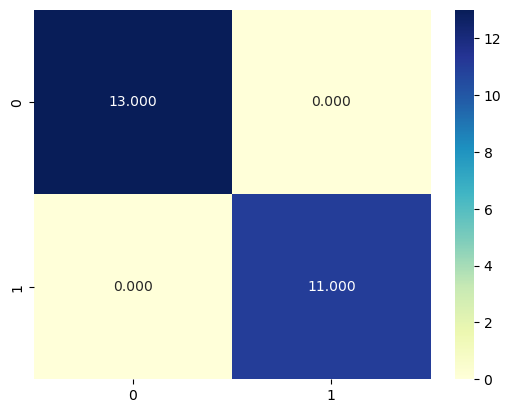

In [335]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels)
plt.show()

## Model Training

## Hyper Parameter Tuining

In [338]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


# Evaluation and Result

In [340]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(Y_test, Y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# Error

# Research